In [1]:
import numpy as np
import pandas as pd
from db_handler import DBHandler
from matplotlib import pyplot as plt
from scipy import stats
from datetime import datetime, timedelta
from calendar import monthrange
%matplotlib inline

def parse_fetches(fetches):
    _new_fetches = list()
    for _fetch in fetches:
        for _doi in _fetch[0].split(", "):
            _new_fetches.append(
                (_doi, _fetch[1])
            )
    return _new_fetches

def get_dois_with_videos_within_days_from_publish(df, table_name, where=None, days_from=None, days_until=None):
#     複数の動画が与えられる論文の場合、複数のsetに含まれることがある。
    _set_target_dois = set()
    db_handler.sql_handler.select(table_name, ["idx_paper", "publishedAt"])
    if type(where) == tuple:
        db_handler.sql_handler.where(*where)
    fetches = db_handler.execute().fetchall()
    fetches = parse_fetches(fetches)
    
    for _row in fetches:
#         print("DOI:", _row[0])
        _target_paper = df[df["DOI"] == _row[0]]
#         if len(_target_paper) == 0:
#             continue
        if len(_target_paper) > 1:
            _target_paper = _target_paper.iloc[0]
#         print(_target_paper)
        _dt_publish = datetime(_target_paper["Year"], _target_paper["Month"], 1)
        
        if days_from != None:
            _dt_video_from = _dt_publish + timedelta(days=days_from)
            if _row[1] < _dt_video_from:
                continue
        
        if days_until != None:
            _dt_video_until = _dt_publish + timedelta(days=days_until)
            if _row[1] > _dt_video_until:
                continue
        
        _set_target_dois.add(_row[0])
    
#     if days_until == None:
#         _set_target_dois = set(map(lambda _row: _row[0], fetches))
#     else:
#         for _row in fetches:
#             _target_paper = df[df["DOI"] == _row[0]]
#             if len(_target_paper) > 1:
#                 _target_paper = _target_paper.iloc[0]
#             _dt_publish = datetime(_target_paper["Year"], _target_paper["Month"], 1)
            
#             _dt_video_from = _dt_publish + timedelta(days=days_from)
#             _dt_video_until = _dt_publish + timedelta(days=days_until)
            
#             if _row[1] < _dt_video_deadline:
#                 _set_target_dois.add(_row[0])
    
    return _set_target_dois

In [2]:
df1 = pd.read_csv("/home/hweem/git/mastersdegree/ytcrawl/customs/scopus/scopus_math+comp_top5perc_1901-1906.csv")
df2 = pd.read_csv("/home/hweem/git/mastersdegree/ytcrawl/customs/scopus/scopus_math+comp_top5perc_1701-1706.csv")
df3 = pd.read_csv("/home/hweem/git/mastersdegree/ytcrawl/customs/scopus/scopus_math+comp_top5perc_1401-1406.csv")

db_handler = DBHandler()
db_handler.sql_handler.select("scopus_videos_2014_comp", ["idx_paper", "publishedAt"])
_videos_2014 = db_handler.execute().fetchall()
db_handler.sql_handler.select("scopus_videos_2014_comp", ["idx_paper", "publishedAt"]).where("content", ["paper_explanation", "paper_assessment", "paper_application"], "in")
_videos_2014_exp = db_handler.execute().fetchall()
db_handler.sql_handler.select("scopus_videos_2017_comp", ["idx_paper", "publishedAt"])
# _videos_2017 = db_handler.execute().fetchall()
# db_handler.sql_handler.select("scopus_videos_2017_comp", ["idx_paper", "publishedAt"]).where("content", ["paper_explanation", "paper_assessment", "paper_application"], "in")
# _videos_2017_exp = db_handler.execute().fetchall()
# db_handler.sql_handler.select("scopus_videos_2019_comp", ["idx_paper", "publishedAt"])
_videos_2019 = db_handler.execute().fetchall()
db_handler.sql_handler.select("scopus_videos_2019_comp", ["idx_paper", "publishedAt"]).where("content", ["paper_explanation", "paper_assessment", "paper_application"], "in")
_videos_2019_exp = db_handler.execute().fetchall()

print(
    len(_videos_2014),
    len(_videos_2014_exp),
#     len(_videos_2017),
#     len(_videos_2017_exp),
    len(_videos_2019),
    len(_videos_2019_exp)
)

	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp`
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp`;
	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp`
	Current list_where_clauses: ["content IN ('paper_explanation', 'paper_assessment', 'paper_application')"]
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2014_comp` WHERE (content IN ('paper_explanation', 'paper_assessment', 'paper_application'));
	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2017_comp`
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2017_comp`;
	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp`
	Current list_where_clauses: ["content IN ('paper_explanation', 'paper_assessment', 'paper_application')"]
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp` WHERE (content IN ('paper_explanation', 'paper_assessment', 'paper_application'));
148 16 107 19


In [3]:
_idx_papers_2019 = get_dois_with_videos_within_days_from_publish(df1, "scopus_videos_2019_comp")
_idx_papers_2019_exp = get_dois_with_videos_within_days_from_publish(df1,
                                                                     "scopus_videos_2019_comp",
                                                                     ("content", ["paper_explanation", "paper_assessment", "paper_application"], "in")
                                                                     )
_idx_papers_2019_news = get_dois_with_videos_within_days_from_publish(df1,
                                                                     "scopus_videos_2019_comp",
                                                                     ("content", "news")
                                                                     )
_idx_papers_2019_sup = get_dois_with_videos_within_days_from_publish(df1,
                                                                     "scopus_videos_2019_comp",
                                                                     ("content", ["paper_linked_supplementary", "paper_supplementary"], "in")
                                                                     )
_idx_papers_2019_ref = get_dois_with_videos_within_days_from_publish(df1,
                                                                     "scopus_videos_2019_comp",
                                                                     ("content", "paper_reference")
                                                                     )
_idx_papers_2014 = get_dois_with_videos_within_days_from_publish(df3, "scopus_videos_2014_comp")
_idx_papers_2014_exp = get_dois_with_videos_within_days_from_publish(df3,
                                                                     "scopus_videos_2014_comp",
                                                                     ("content", ["paper_explanation", "paper_assessment", "paper_application"], "in")
                                                                     )
_idx_papers_2014_news = get_dois_with_videos_within_days_from_publish(df3,
                                                                     "scopus_videos_2014_comp",
                                                                     ("content", "news")
                                                                     )
_idx_papers_2014_sup = get_dois_with_videos_within_days_from_publish(df3,
                                                                     "scopus_videos_2014_comp",
                                                                     ("content", ["paper_linked_supplementary", "paper_supplementary"], "in")
                                                                     )
_idx_papers_2014_ref = get_dois_with_videos_within_days_from_publish(df3,
                                                                     "scopus_videos_2014_comp",
                                                                     ("content", "paper_reference")
                                                                     )

print(len(_idx_papers_2019),
    len(_idx_papers_2019_exp),
    len(_idx_papers_2019_news),
    len(_idx_papers_2019_sup),
    len(_idx_papers_2019_ref),
    len(_idx_papers_2014),
    len(_idx_papers_2014_exp),
    len(_idx_papers_2014_news),
    len(_idx_papers_2014_sup),
    len(_idx_papers_2014_ref)
)
print(
    "2019 ratio of papers w/ videos: %.2f\n2014 ratio of papers w/ videos: %.2f" % (100 * len(_idx_papers_2019) / len(df1), 100 * len(_idx_papers_2014) / len(df3))
)

	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp`
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp`;
	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp`
	Current list_where_clauses: ["content IN ('paper_explanation', 'paper_assessment', 'paper_application')"]
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp` WHERE (content IN ('paper_explanation', 'paper_assessment', 'paper_application'));
	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp`
	Current list_where_clauses: ["`content`='news'"]
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp` WHERE (`content`='news');
	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp`
	Current list_where_clauses: ["content IN ('paper_linked_supplementary', 'paper_supplementary')"]
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp` WHERE (content IN ('paper_linked_su

/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean 

{'boxes': [<matplotlib.lines.Line2D at 0x7f1575266b00>,
 'caps': [<matplotlib.lines.Line2D at 0x7f157525aac8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f15752677f0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f15752679b0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1575266ac8>,
  <matplotlib.lines.Line2D at 0x7f15745b8908>]}

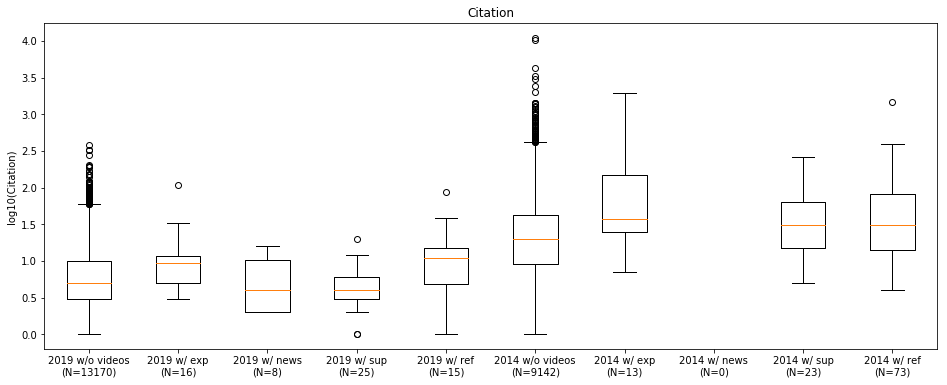

In [21]:
_2019_wo_videos_cit = np.log10(df1[~df1.DOI.isin(_idx_papers_2019)][df1["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2019_w_videos_cit_exp = np.log10(df1[df1.DOI.isin(_idx_papers_2019_exp)][df1["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2019_w_videos_cit_news = np.log10(df1[df1.DOI.isin(_idx_papers_2019_news)][df1["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2019_w_videos_cit_sup = np.log10(df1[df1.DOI.isin(_idx_papers_2019_sup)][df1["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2019_w_videos_cit_ref = np.log10(df1[df1.DOI.isin(_idx_papers_2019_ref)][df1["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2014_wo_videos_cit = np.log10(df3[~df3.DOI.isin(_idx_papers_2014)][df3["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2014_w_videos_cit_exp = np.log10(df3[df3.DOI.isin(_idx_papers_2014_exp)][df3["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2014_w_videos_cit_news = np.log10(df3[df3.DOI.isin(_idx_papers_2014_news)][df3["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2014_w_videos_cit_sup = np.log10(df3[df3.DOI.isin(_idx_papers_2014_sup)][df3["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2014_w_videos_cit_ref = np.log10(df3[df3.DOI.isin(_idx_papers_2014_ref)][df3["Cited by"] != "None"]["Cited by"].dropna().astype(int))

plt.figure(figsize=(16, 6))
plt.title("Citation")
# plt.yscale("log")
# plt.ylim([0, 200])
plt.ylabel("log10(Citation)")
plt.boxplot([
    _2019_wo_videos_cit,
    _2019_w_videos_cit_exp,
    _2019_w_videos_cit_news,
    _2019_w_videos_cit_sup,
    _2019_w_videos_cit_ref,
    _2014_wo_videos_cit,
    _2014_w_videos_cit_exp,
    _2014_w_videos_cit_news,
    _2014_w_videos_cit_sup,
    _2014_w_videos_cit_ref
],
    labels=[
        "2019 w/o videos\n(N=%s)"%len(_2019_wo_videos_cit),
        "2019 w/ exp\n(N=%s)"%len(_2019_w_videos_cit_exp),
        "2019 w/ news\n(N=%s)"%len(_2019_w_videos_cit_news),
        "2019 w/ sup\n(N=%s)"%len(_2019_w_videos_cit_sup),
        "2019 w/ ref\n(N=%s)"%len(_2019_w_videos_cit_ref),
        "2014 w/o videos\n(N=%s)"%len(_2014_wo_videos_cit),
        "2014 w/ exp\n(N=%s)"%len(_2014_w_videos_cit_exp),
        "2014 w/ news\n(N=%s)"%len(_2014_w_videos_cit_news),
        "2014 w/ sup\n(N=%s)"%len(_2014_w_videos_cit_sup),
        "2014 w/ ref\n(N=%s)"%len(_2014_w_videos_cit_ref),
    ]
)

In [22]:
_s2019_exp, _p2019_exp = stats.ttest_ind(
    _2019_wo_videos_cit,
    _2019_w_videos_cit_exp
)
print("2019 exp\tS = %.4f\tp = %.4f"%(_s2019_exp, _p2019_exp))
_s2019_news, _p2019_news = stats.ttest_ind(
    _2019_wo_videos_cit,
    _2019_w_videos_cit_news
)
print("2019 news\tS = %.4f\tp = %.4f"%(_s2019_news, _p2019_news))
_s2019_sup, _p2019_sup = stats.ttest_ind(
    _2019_wo_videos_cit,
    _2019_w_videos_cit_sup
)
print("2019 sup\tS = %.4f\tp = %.4f"%(_s2019_sup, _p2019_sup))
_s2019_ref, _p2019_ref = stats.ttest_ind(
    _2019_wo_videos_cit,
    _2019_w_videos_cit_ref
)
print("2019 ref\tS = %.4f\tp = %.4f"%(_s2019_ref, _p2019_ref))
_s2014_exp, _p2014_exp = stats.ttest_ind(
    _2014_wo_videos_cit,
    _2014_w_videos_cit_exp
)
print("2014 exp\tS = %.4f\tp = %.4f"%(_s2014_exp, _p2014_exp))
_s2014_news, _p2014_news = stats.ttest_ind(
    _2014_wo_videos_cit,
    _2014_w_videos_cit_news
)
print("2014 news\tS = %.4f\tp = %.4f"%(_s2014_news, _p2014_news))
_s2014_sup, _p2014_sup = stats.ttest_ind(
    _2014_wo_videos_cit,
    _2014_w_videos_cit_sup
)
print("2014 sup\tS = %.4f\tp = %.4f"%(_s2014_sup, _p2014_sup))
_s2014_ref, _p2014_ref = stats.ttest_ind(
    _2014_wo_videos_cit,
    _2014_w_videos_cit_ref
)
print("2014 ref\tS = %.4f\tp = %.4f"%(_s2014_ref, _p2014_ref))

2019 exp	S = -2.4243	p = 0.0154
2019 news	S = 0.1929	p = 0.8470
2019 sup	S = 1.2619	p = 0.2070
2019 ref	S = -2.4404	p = 0.0147
2014 exp	S = -3.5110	p = 0.0004
2014 news	S = nan	p = nan
2014 sup	S = -1.9770	p = 0.0481
2014 ref	S = -4.5366	p = 0.0000


2019: exp/ref에 관해선 유의, news/sup에 관해선 유의하지 않음.
2014는 전체적으로 유의.
가설1: 2019와 2014의 비디오 리서치 영향력의 차이.
가설2: 시간이 지날수록 어떠한 논문이든 비디오가 있으면 유의차를 보이게 됨 <- 그다지 신뢰성이...

AAS

/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean 

{'boxes': [<matplotlib.lines.Line2D at 0x7f15746da6d8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f15746dae80>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f15746e7898>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f15746e7550>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f15746da828>,
  <matplotlib.lines.Line2D at 0x7f1574471d30>]}

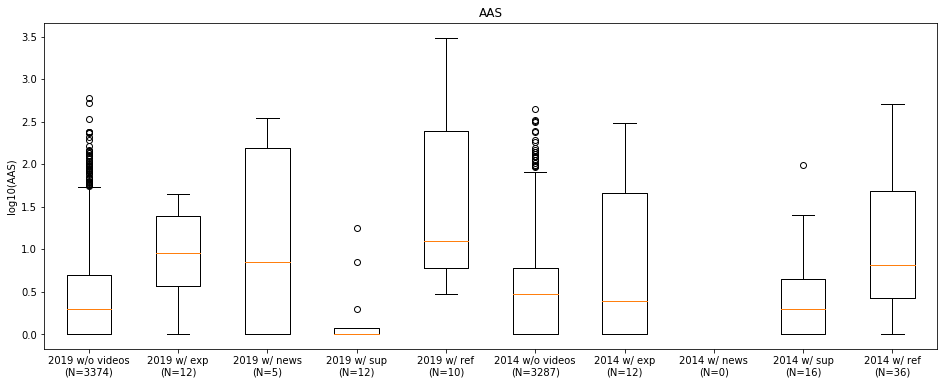

In [23]:
_2019_wo_videos_aas = np.log10(df1[~df1.DOI.isin(_idx_papers_2019)][df1["AAS"] != "None"]["AAS"].dropna().astype(int))
_2019_w_videos_aas_exp = np.log10(df1[df1.DOI.isin(_idx_papers_2019_exp)][df1["AAS"] != "None"]["AAS"].dropna().astype(int))
_2019_w_videos_aas_news = np.log10(df1[df1.DOI.isin(_idx_papers_2019_news)][df1["AAS"] != "None"]["AAS"].dropna().astype(int))
_2019_w_videos_aas_sup = np.log10(df1[df1.DOI.isin(_idx_papers_2019_sup)][df1["AAS"] != "None"]["AAS"].dropna().astype(int))
_2019_w_videos_aas_ref = np.log10(df1[df1.DOI.isin(_idx_papers_2019_ref)][df1["AAS"] != "None"]["AAS"].dropna().astype(int))
_2014_wo_videos_aas = np.log10(df3[~df3.DOI.isin(_idx_papers_2014)][df3["AAS"] != "None"]["AAS"].dropna().astype(int))
_2014_w_videos_aas_exp = np.log10(df3[df3.DOI.isin(_idx_papers_2014_exp)][df3["AAS"] != "None"]["AAS"].dropna().astype(int))
_2014_w_videos_aas_news = np.log10(df3[df3.DOI.isin(_idx_papers_2014_news)][df3["AAS"] != "None"]["AAS"].dropna().astype(int))
_2014_w_videos_aas_sup = np.log10(df3[df3.DOI.isin(_idx_papers_2014_sup)][df3["AAS"] != "None"]["AAS"].dropna().astype(int))
_2014_w_videos_aas_ref = np.log10(df3[df3.DOI.isin(_idx_papers_2014_ref)][df3["AAS"] != "None"]["AAS"].dropna().astype(int))

plt.figure(figsize=(16, 6))
plt.title("AAS")
# plt.yscale("log")
# plt.ylim([0, 200])
plt.ylabel("log10(AAS)")
plt.boxplot([
    _2019_wo_videos_aas,
    _2019_w_videos_aas_exp,
    _2019_w_videos_aas_news,
    _2019_w_videos_aas_sup,
    _2019_w_videos_aas_ref,
    _2014_wo_videos_aas,
    _2014_w_videos_aas_exp,
    _2014_w_videos_aas_news,
    _2014_w_videos_aas_sup,
    _2014_w_videos_aas_ref
],
    labels=[
        "2019 w/o videos\n(N=%s)"%len(_2019_wo_videos_aas),
        "2019 w/ exp\n(N=%s)"%len(_2019_w_videos_aas_exp),
        "2019 w/ news\n(N=%s)"%len(_2019_w_videos_aas_news),
        "2019 w/ sup\n(N=%s)"%len(_2019_w_videos_aas_sup),
        "2019 w/ ref\n(N=%s)"%len(_2019_w_videos_aas_ref),
        "2014 w/o videos\n(N=%s)"%len(_2014_wo_videos_aas),
        "2014 w/ exp\n(N=%s)"%len(_2014_w_videos_aas_exp),
        "2014 w/ news\n(N=%s)"%len(_2014_w_videos_aas_news),
        "2014 w/ sup\n(N=%s)"%len(_2014_w_videos_aas_sup),
        "2014 w/ ref\n(N=%s)"%len(_2014_w_videos_aas_ref),
    ]
)

In [25]:
_s2019_exp, _p2019_exp = stats.ttest_ind(
    _2019_wo_videos_aas,
    _2019_w_videos_aas_exp
)
print("2019 exp\tN = %d\tS = %.4f\tp = %.4f"%(len(_2019_w_videos_aas_exp), _s2019_exp, _p2019_exp))
_s2019_news, _p2019_news = stats.ttest_ind(
    _2019_wo_videos_aas,
    _2019_w_videos_aas_news
)
print("2019 news\tN = %d\tS = %.4f\tp = %.4f"%(len(_2019_w_videos_aas_news), _s2019_news, _p2019_news))
_s2019_sup, _p2019_sup = stats.ttest_ind(
    _2019_wo_videos_aas,
    _2019_w_videos_aas_sup
)
print("2019 sup\tN = %d\tS = %.4f\tp = %.4f"%(len(_2019_w_videos_aas_sup), _s2019_sup, _p2019_sup))
_s2019_ref, _p2019_ref = stats.ttest_ind(
    _2019_wo_videos_aas,
    _2019_w_videos_aas_ref
)
print("2019 ref\tN = %d\tS = %.4f\tp = %.4f"%(len(_2019_w_videos_aas_ref), _s2019_ref, _p2019_ref))
_s2014_exp, _p2014_exp = stats.ttest_ind(
    _2014_wo_videos_aas,
    _2014_w_videos_aas_exp
)
print("2014 exp\tN = %d\tS = %.4f\tp = %.4f"%(len(_2014_w_videos_aas_exp), _s2014_exp, _p2014_exp))
_s2014_news, _p2014_news = stats.ttest_ind(
    _2014_wo_videos_aas,
    _2014_w_videos_aas_news
)
print("2014 news\tN = %d\tS = %.4f\tp = %.4f"%(len(_2014_w_videos_aas_news), _s2014_news, _p2014_news))
_s2014_sup, _p2014_sup = stats.ttest_ind(
    _2014_wo_videos_aas,
    _2014_w_videos_aas_sup
)
print("2014 sup\tN = %d\tS = %.4f\tp = %.4f"%(len(_2014_w_videos_aas_sup), _s2014_sup, _p2014_sup))
_s2014_ref, _p2014_ref = stats.ttest_ind(
    _2014_wo_videos_aas,
    _2014_w_videos_aas_ref
)
print("2014 ref\tN = %d\tS = %.4f\tp = %.4f"%(len(_2014_w_videos_aas_ref), _s2014_ref, _p2014_ref))

2019 exp	N = 12	S = -3.7010	p = 0.0002
2019 news	N = 5	S = -3.2458	p = 0.0012
2019 sup	N = 12	S = 1.6183	p = 0.1057
2019 ref	N = 10	S = -7.3688	p = 0.0000
2014 exp	N = 12	S = -3.3445	p = 0.0008
2014 news	N = 0	S = nan	p = nan
2014 sup	N = 16	S = -0.3852	p = 0.7001
2014 ref	N = 36	S = -7.9295	p = 0.0000


연도에 상관없이 sup비디오가 ASS에 주는 영향은 유의하지 않음.

exp가 ref보다 더 낮은 AAS를 주는 경향이 보임.
exp, ref둘 다 비슷한 citation이 부여됨.

exp, ref비디오의 영향력을, 비디오 release date로 나누어 분석하면?(샘플수가 적은데...)

In [27]:
_idx_papers_2019_exp = get_dois_with_videos_within_days_from_publish(
    df1,
    "scopus_videos_2019_comp",
    ("content", ["paper_explanation", "paper_assessment", "paper_application"], "in")
)
_idx_papers_2019_exp_90 = get_dois_with_videos_within_days_from_publish(
    df1,
    "scopus_videos_2019_comp",
    ("content", ["paper_explanation", "paper_assessment", "paper_application"], "in")
, None, 90)
_idx_papers_2019_exp_180 = get_dois_with_videos_within_days_from_publish(
    df1,
    "scopus_videos_2019_comp",
    ("content", ["paper_explanation", "paper_assessment", "paper_application"], "in")
, 90, 180)
_idx_papers_2019_exp_270 = get_dois_with_videos_within_days_from_publish(
    df1,
    "scopus_videos_2019_comp",
    ("content", ["paper_explanation", "paper_assessment", "paper_application"], "in")
, 180, 270)
_idx_papers_2019_exp_360 = get_dois_with_videos_within_days_from_publish(
    df1,
    "scopus_videos_2019_comp",
    ("content", ["paper_explanation", "paper_assessment", "paper_application"], "in")
, 270, 360)
_idx_papers_2019_exp_rest = get_dois_with_videos_within_days_from_publish(
    df1,
    "scopus_videos_2019_comp",
    ("content", ["paper_explanation", "paper_assessment", "paper_application"], "in")
, 360, None)
print(len(_idx_papers_2019_exp), len(_idx_papers_2019_exp_90), len(_idx_papers_2019_exp_180), len(_idx_papers_2019_exp_270), len(_idx_papers_2019_exp_360), len(_idx_papers_2019_exp_rest))

_idx_papers_2014_exp = get_dois_with_videos_within_days_from_publish(
    df3,
    "scopus_videos_2014_comp",
    ("content", ["paper_explanation", "paper_assessment", "paper_application"], "in")
)
_idx_papers_2014_exp_90 = get_dois_with_videos_within_days_from_publish(
    df3,
    "scopus_videos_2014_comp",
    ("content", ["paper_explanation", "paper_assessment", "paper_application"], "in")
, None, 90)
_idx_papers_2014_exp_180 = get_dois_with_videos_within_days_from_publish(
    df3,
    "scopus_videos_2014_comp",
    ("content", ["paper_explanation", "paper_assessment", "paper_application"], "in")
, 90, 180)
_idx_papers_2014_exp_270 = get_dois_with_videos_within_days_from_publish(
    df3,
    "scopus_videos_2014_comp",
    ("content", ["paper_explanation", "paper_assessment", "paper_application"], "in")
, 180, 270)
_idx_papers_2014_exp_360 = get_dois_with_videos_within_days_from_publish(
    df3,
    "scopus_videos_2014_comp",
    ("content", ["paper_explanation", "paper_assessment", "paper_application"], "in")
, 270, 360)
_idx_papers_2014_exp_rest = get_dois_with_videos_within_days_from_publish(
    df3,
    "scopus_videos_2014_comp",
    ("content", ["paper_explanation", "paper_assessment", "paper_application"], "in")
, 360, None)
print(len(_idx_papers_2014_exp), len(_idx_papers_2014_exp_90), len(_idx_papers_2014_exp_180), len(_idx_papers_2014_exp_270), len(_idx_papers_2014_exp_360), len(_idx_papers_2014_exp_rest))

	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp`
	Current list_where_clauses: ["content IN ('paper_explanation', 'paper_assessment', 'paper_application')"]
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp` WHERE (content IN ('paper_explanation', 'paper_assessment', 'paper_application'));
	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp`
	Current list_where_clauses: ["content IN ('paper_explanation', 'paper_assessment', 'paper_application')"]
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp` WHERE (content IN ('paper_explanation', 'paper_assessment', 'paper_application'));
	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp`
	Current list_where_clauses: ["content IN ('paper_explanation', 'paper_assessment', 'paper_application')"]
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp` WHERE (content IN ('paper_explanation', 'paper_assessment', 'pa

/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean 

{'boxes': [<matplotlib.lines.Line2D at 0x7f1571907470>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1571907c18>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1571913630>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f15719132e8>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1571907588>,
  <matplotlib.lines.Line2D at 0x7f15718aed68>]}

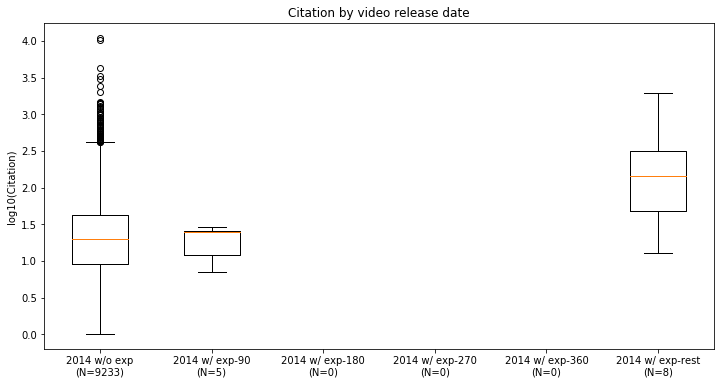

In [38]:
_2014_wo_exp_cit = np.log10(df3[~df3.DOI.isin(_idx_papers_2014_exp)][df3["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2014_90_w_exp_cit = np.log10(df3[df3.DOI.isin(_idx_papers_2014_exp_90)][df3["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2014_180_w_exp_cit = np.log10(df3[df3.DOI.isin(_idx_papers_2014_exp_180)][df3["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2014_270_w_exp_cit = np.log10(df3[df3.DOI.isin(_idx_papers_2014_exp_270)][df3["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2014_360_w_exp_cit = np.log10(df3[df3.DOI.isin(_idx_papers_2014_exp_360)][df3["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2014_rest_w_exp_cit = np.log10(df3[df3.DOI.isin(_idx_papers_2014_exp_rest)][df3["Cited by"] != "None"]["Cited by"].dropna().astype(int))

plt.figure(figsize=(12, 6))
plt.title("Citation by video release date")
# plt.yscale("log")
# plt.ylim([0, 200])
plt.ylabel("log10(Citation)")
plt.boxplot([
    _2014_wo_exp_cit,
    _2014_90_w_exp_cit,
    _2014_180_w_exp_cit,
    _2014_270_w_exp_cit,
    _2014_360_w_exp_cit,
    _2014_rest_w_exp_cit
],
    labels=[
        "2014 w/o exp\n(N=%s)"%len(_2014_wo_exp_cit),
        "2014 w/ exp-90\n(N=%s)"%len(_2014_90_w_exp_cit),
        "2014 w/ exp-180\n(N=%s)"%len(_2014_180_w_exp_cit),
        "2014 w/ exp-270\n(N=%s)"%len(_2014_270_w_exp_cit),
        "2014 w/ exp-360\n(N=%s)"%len(_2014_360_w_exp_cit),
        "2014 w/ exp-rest\n(N=%s)"%len(_2014_rest_w_exp_cit)
    ]
)

In [32]:
_s2014, _p2014 = stats.ttest_ind(
    _2014_wo_exp_cit,
    _2014_90_w_exp_cit
)
print("2014-90\tN = %d\tS = %f\tp = %f" % (len(_2014_90_w_exp_cit), _s2014, _p2014))
_s2014, _p2014 = stats.ttest_ind(
    _2014_wo_exp_cit,
    _2014_180_w_exp_cit
)
print("2014-180\tN = %d\tS = %f\tp = %f" % (len(_2014_180_w_exp_cit), _s2014, _p2014))
_s2014, _p2014 = stats.ttest_ind(
    _2014_wo_exp_cit,
    _2014_270_w_exp_cit
)
print("2014-270\tN = %d\tS = %f\tp = %f" % (len(_2014_270_w_exp_cit), _s2014, _p2014))
_s2014, _p2014 = stats.ttest_ind(
    _2014_wo_exp_cit,
    _2014_360_w_exp_cit
)
print("2014-360\tN = %d\tS = %f\tp = %f" % (len(_2014_360_w_exp_cit), _s2014, _p2014))
_s2014, _p2014 = stats.ttest_ind(
    _2014_wo_exp_cit,
    _2014_rest_w_exp_cit
)
print("2014-rest\tN = %d\tS = %f\tp = %f" % (len(_2014_rest_w_exp_cit), _s2014, _p2014))

2014-90	N = 5	S = 0.168630	p = 0.866091
2014-180	N = 0	S = nan	p = nan
2014-270	N = 0	S = nan	p = nan
2014-360	N = 0	S = nan	p = nan
2014-rest	N = 8	S = -4.586333	p = 0.000005


2014년의 경우, 논문 게재 초기(90) exp비디오보다, 게재 1년 경과 후 exp비디오가 붙은 논문이 citation이 높은 경향을 보임. <-1. 채널이 유명하지 않아서? 2. 퀄리티가 떨어져서?

/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean 

{'boxes': [<matplotlib.lines.Line2D at 0x7f157185f400>,
 'caps': [<matplotlib.lines.Line2D at 0x7f157185fba8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f15718655c0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f1571865278>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f157185f518>,
  <matplotlib.lines.Line2D at 0x7f1571882cf8>]}

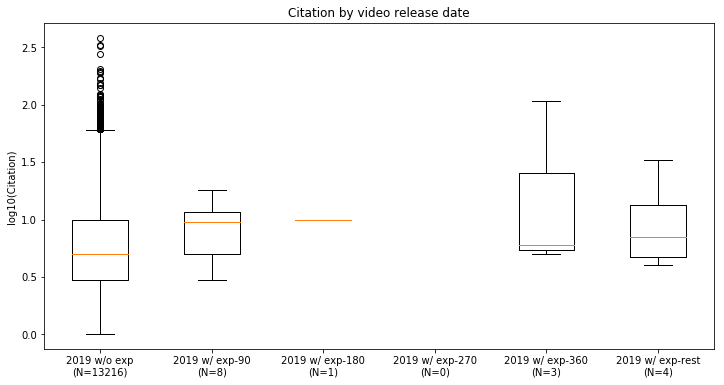

In [39]:
_2019_wo_exp_cit = np.log10(df1[~df1.DOI.isin(_idx_papers_2019_exp)][df1["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2019_90_w_exp_cit = np.log10(df1[df1.DOI.isin(_idx_papers_2019_exp_90)][df1["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2019_180_w_exp_cit = np.log10(df1[df1.DOI.isin(_idx_papers_2019_exp_180)][df1["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2019_270_w_exp_cit = np.log10(df1[df1.DOI.isin(_idx_papers_2019_exp_270)][df1["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2019_360_w_exp_cit = np.log10(df1[df1.DOI.isin(_idx_papers_2019_exp_360)][df1["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2019_rest_w_exp_cit = np.log10(df1[df1.DOI.isin(_idx_papers_2019_exp_rest)][df1["Cited by"] != "None"]["Cited by"].dropna().astype(int))

plt.figure(figsize=(12, 6))
plt.title("Citation by video release date")
# plt.yscale("log")
# plt.ylim([0, 200])
plt.ylabel("log10(Citation)")
plt.boxplot([
    _2019_wo_exp_cit,
    _2019_90_w_exp_cit,
    _2019_180_w_exp_cit,
    _2019_270_w_exp_cit,
    _2019_360_w_exp_cit,
    _2019_rest_w_exp_cit
],
    labels=[
        "2019 w/o exp\n(N=%s)"%len(_2019_wo_exp_cit),
        "2019 w/ exp-90\n(N=%s)"%len(_2019_90_w_exp_cit),
        "2019 w/ exp-180\n(N=%s)"%len(_2019_180_w_exp_cit),
        "2019 w/ exp-270\n(N=%s)"%len(_2019_270_w_exp_cit),
        "2019 w/ exp-360\n(N=%s)"%len(_2019_360_w_exp_cit),
        "2019 w/ exp-rest\n(N=%s)"%len(_2019_rest_w_exp_cit)
    ]
)

In [40]:
_s2019, _p2019 = stats.ttest_ind(
    _2019_wo_exp_cit,
    _2019_90_w_exp_cit
)
print("2019-90\tN = %d\tS = %f\tp = %f" % (len(_2019_90_w_exp_cit), _s2019, _p2019))
_s2019, _p2019 = stats.ttest_ind(
    _2019_wo_exp_cit,
    _2019_180_w_exp_cit
)
print("2019-180\tN = %d\tS = %f\tp = %f" % (len(_2019_180_w_exp_cit), _s2019, _p2019))
_s2019, _p2019 = stats.ttest_ind(
    _2019_wo_exp_cit,
    _2019_270_w_exp_cit
)
print("2019-270\tN = %d\tS = %f\tp = %f" % (len(_2019_270_w_exp_cit), _s2019, _p2019))
_s2019, _p2019 = stats.ttest_ind(
    _2019_wo_exp_cit,
    _2019_360_w_exp_cit
)
print("2019-360\tN = %d\tS = %f\tp = %f" % (len(_2019_360_w_exp_cit), _s2019, _p2019))
_s2019, _p2019 = stats.ttest_ind(
    _2019_wo_exp_cit,
    _2019_rest_w_exp_cit
)
print("2019-rest\tN = %d\tS = %f\tp = %f" % (len(_2019_rest_w_exp_cit), _s2019, _p2019))

2019-90	N = 8	S = -1.225237	p = 0.220508
2019-180	N = 1	S = nan	p = nan
2019-270	N = 0	S = nan	p = nan
2019-360	N = 3	S = -1.865072	p = 0.062193
2019-rest	N = 4	S = -1.160369	p = 0.245920


반면 2019에 대해선 공개시기에 따른 유의성을 못찾음.

AAS에 대해선? <- ref로 해보자

In [36]:
_idx_papers_2019_ref = get_dois_with_videos_within_days_from_publish(
    df1,
    "scopus_videos_2019_comp",
    ("content", "paper_reference")
)
_idx_papers_2019_ref_90 = get_dois_with_videos_within_days_from_publish(
    df1,
    "scopus_videos_2019_comp",
    ("content", "paper_reference")
, None, 90)
_idx_papers_2019_ref_180 = get_dois_with_videos_within_days_from_publish(
    df1,
    "scopus_videos_2019_comp",
    ("content", "paper_reference")
, 90, 180)
_idx_papers_2019_ref_270 = get_dois_with_videos_within_days_from_publish(
    df1,
    "scopus_videos_2019_comp",
    ("content", "paper_reference")
, 180, 270)
_idx_papers_2019_ref_360 = get_dois_with_videos_within_days_from_publish(
    df1,
    "scopus_videos_2019_comp",
    ("content", "paper_reference")
, 270, 360)
_idx_papers_2019_ref_rest = get_dois_with_videos_within_days_from_publish(
    df1,
    "scopus_videos_2019_comp",
    ("content", "paper_reference")
, 360, None)
print(len(_idx_papers_2019_ref), len(_idx_papers_2019_ref_90), len(_idx_papers_2019_ref_180), len(_idx_papers_2019_ref_270), len(_idx_papers_2019_ref_360), len(_idx_papers_2019_ref_rest))

_idx_papers_2014_ref = get_dois_with_videos_within_days_from_publish(
    df3,
    "scopus_videos_2014_comp",
    ("content", "paper_reference")
)
_idx_papers_2014_ref_90 = get_dois_with_videos_within_days_from_publish(
    df3,
    "scopus_videos_2014_comp",
    ("content", "paper_reference")
, None, 90)
_idx_papers_2014_ref_180 = get_dois_with_videos_within_days_from_publish(
    df3,
    "scopus_videos_2014_comp",
    ("content", "paper_reference")
, 90, 180)
_idx_papers_2014_ref_270 = get_dois_with_videos_within_days_from_publish(
    df3,
    "scopus_videos_2014_comp",
    ("content", "paper_reference")
, 180, 270)
_idx_papers_2014_ref_360 = get_dois_with_videos_within_days_from_publish(
    df3,
    "scopus_videos_2014_comp",
    ("content", "paper_reference")
, 270, 360)
_idx_papers_2014_ref_rest = get_dois_with_videos_within_days_from_publish(
    df3,
    "scopus_videos_2014_comp",
    ("content", "paper_reference")
, 360, None)
print(len(_idx_papers_2014_ref), len(_idx_papers_2014_ref_90), len(_idx_papers_2014_ref_180), len(_idx_papers_2014_ref_270), len(_idx_papers_2014_ref_360), len(_idx_papers_2014_ref_rest))

	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp`
	Current list_where_clauses: ["`content`='paper_reference'"]
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp` WHERE (`content`='paper_reference');
	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp`
	Current list_where_clauses: ["`content`='paper_reference'"]
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp` WHERE (`content`='paper_reference');
	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp`
	Current list_where_clauses: ["`content`='paper_reference'"]
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp` WHERE (`content`='paper_reference');
	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp`
	Current list_where_clauses: ["`content`='paper_reference'"]
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_comp` WHERE (`content`='paper_reference');
	Command

/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean 

{'boxes': [<matplotlib.lines.Line2D at 0x7f15718355f8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1571835da0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f15718267b8>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f1571826470>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1571835710>,
  <matplotlib.lines.Line2D at 0x7f1571850ef0>]}

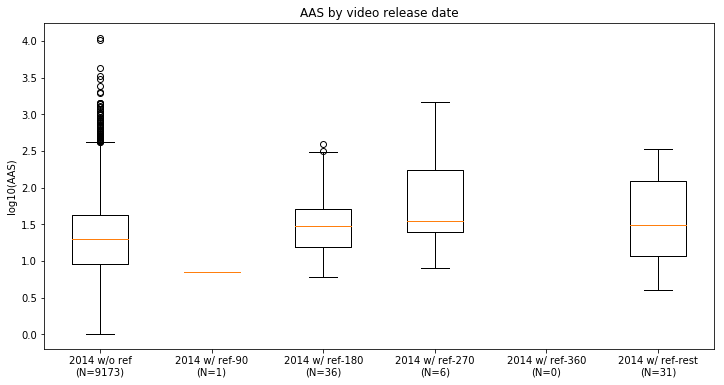

In [41]:
_2014_wo_ref_aas = np.log10(df3[~df3.DOI.isin(_idx_papers_2014_ref)][df3["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2014_90_w_ref_aas = np.log10(df3[df3.DOI.isin(_idx_papers_2014_ref_90)][df3["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2014_180_w_ref_aas = np.log10(df3[df3.DOI.isin(_idx_papers_2014_ref_180)][df3["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2014_270_w_ref_aas = np.log10(df3[df3.DOI.isin(_idx_papers_2014_ref_270)][df3["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2014_360_w_ref_aas = np.log10(df3[df3.DOI.isin(_idx_papers_2014_ref_360)][df3["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2014_rest_w_ref_aas = np.log10(df3[df3.DOI.isin(_idx_papers_2014_ref_rest)][df3["Cited by"] != "None"]["Cited by"].dropna().astype(int))

plt.figure(figsize=(12, 6))
plt.title("AAS by video release date")
# plt.yscale("log")
# plt.ylim([0, 200])
plt.ylabel("log10(AAS)")
plt.boxplot([
    _2014_wo_ref_aas,
    _2014_90_w_ref_aas,
    _2014_180_w_ref_aas,
    _2014_270_w_ref_aas,
    _2014_360_w_ref_aas,
    _2014_rest_w_ref_aas
],
    labels=[
        "2014 w/o ref\n(N=%s)"%len(_2014_wo_ref_aas),
        "2014 w/ ref-90\n(N=%s)"%len(_2014_90_w_ref_aas),
        "2014 w/ ref-180\n(N=%s)"%len(_2014_180_w_ref_aas),
        "2014 w/ ref-270\n(N=%s)"%len(_2014_270_w_ref_aas),
        "2014 w/ ref-360\n(N=%s)"%len(_2014_360_w_ref_aas),
        "2014 w/ ref-rest\n(N=%s)"%len(_2014_rest_w_ref_aas)
    ]
)

In [45]:
_s2014, _p2014 = stats.ttest_ind(
    _2014_wo_ref_aas,
    _2014_90_w_ref_aas
)
print("2014-90\tN = %d\tS = %f\tp = %f" % (len(_2014_90_w_ref_aas), _s2014, _p2014))
_s2014, _p2014 = stats.ttest_ind(
    _2014_wo_ref_aas,
    _2014_180_w_ref_aas
)
print("2014-180\tN = %d\tS = %f\tp = %f" % (len(_2014_180_w_ref_aas), _s2014, _p2014))
_s2014, _p2014 = stats.ttest_ind(
    _2014_wo_ref_aas,
    _2014_270_w_ref_aas
)
print("2014-270\tN = %d\tS = %f\tp = %f" % (len(_2014_270_w_ref_aas), _s2014, _p2014))
_s2014, _p2014 = stats.ttest_ind(
    _2014_wo_ref_aas,
    _2014_360_w_ref_aas
)
print("2014-360\tN = %d\tS = %f\tp = %f" % (len(_2014_360_w_ref_aas), _s2014, _p2014))
_s2014, _p2014 = stats.ttest_ind(
    _2014_wo_ref_aas,
    _2014_rest_w_ref_aas
)
print("2014-rest\tN = %d\tS = %f\tp = %f" % (len(_2014_rest_w_ref_aas), _s2014, _p2014))

2014-90	N = 1	S = nan	p = nan
2014-180	N = 36	S = -2.633632	p = 0.008462
2014-270	N = 6	S = -2.550456	p = 0.010774
2014-360	N = 0	S = nan	p = nan
2014-rest	N = 31	S = -3.165193	p = 0.001555


2014엔 ref비디오 공개 시기에 관계없이 AAS 유의차를 보임

/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/hweem/git/mastersdegree/ytcrawl/ytcrawl0/lib/python3.5/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean 

{'boxes': [<matplotlib.lines.Line2D at 0x7f15717fb7b8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f15717fbf60>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1571807978>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f1571807630>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f15717fb8d0>,
  <matplotlib.lines.Line2D at 0x7f15717a90f0>]}

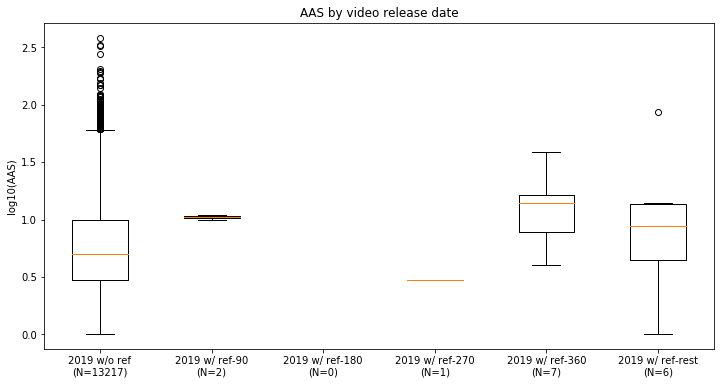

In [42]:
_2019_wo_ref_aas = np.log10(df1[~df1.DOI.isin(_idx_papers_2019_ref)][df1["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2019_90_w_ref_aas = np.log10(df1[df1.DOI.isin(_idx_papers_2019_ref_90)][df1["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2019_180_w_ref_aas = np.log10(df1[df1.DOI.isin(_idx_papers_2019_ref_180)][df1["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2019_270_w_ref_aas = np.log10(df1[df1.DOI.isin(_idx_papers_2019_ref_270)][df1["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2019_360_w_ref_aas = np.log10(df1[df1.DOI.isin(_idx_papers_2019_ref_360)][df1["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2019_rest_w_ref_aas = np.log10(df1[df1.DOI.isin(_idx_papers_2019_ref_rest)][df1["Cited by"] != "None"]["Cited by"].dropna().astype(int))

plt.figure(figsize=(12, 6))
plt.title("AAS by video release date")
# plt.yscale("log")
# plt.ylim([0, 200])
plt.ylabel("log10(AAS)")
plt.boxplot([
    _2019_wo_ref_aas,
    _2019_90_w_ref_aas,
    _2019_180_w_ref_aas,
    _2019_270_w_ref_aas,
    _2019_360_w_ref_aas,
    _2019_rest_w_ref_aas
],
    labels=[
        "2019 w/o ref\n(N=%s)"%len(_2019_wo_ref_aas),
        "2019 w/ ref-90\n(N=%s)"%len(_2019_90_w_ref_aas),
        "2019 w/ ref-180\n(N=%s)"%len(_2019_180_w_ref_aas),
        "2019 w/ ref-270\n(N=%s)"%len(_2019_270_w_ref_aas),
        "2019 w/ ref-360\n(N=%s)"%len(_2019_360_w_ref_aas),
        "2019 w/ ref-rest\n(N=%s)"%len(_2019_rest_w_ref_aas)
    ]
)

In [43]:
_s2019, _p2019 = stats.ttest_ind(
    _2019_wo_ref_aas,
    _2019_90_w_ref_aas
)
print("2019-90\tN = %d\tS = %f\tp = %f" % (len(_2019_90_w_ref_aas), _s2019, _p2019))
_s2019, _p2019 = stats.ttest_ind(
    _2019_wo_ref_aas,
    _2019_180_w_ref_aas
)
print("2019-180\tN = %d\tS = %f\tp = %f" % (len(_2019_180_w_ref_aas), _s2019, _p2019))
_s2019, _p2019 = stats.ttest_ind(
    _2019_wo_ref_aas,
    _2019_270_w_ref_aas
)
print("2019-270\tN = %d\tS = %f\tp = %f" % (len(_2019_270_w_ref_aas), _s2019, _p2019))
_s2019, _p2019 = stats.ttest_ind(
    _2019_wo_ref_aas,
    _2019_360_w_ref_aas
)
print("2019-360\tN = %d\tS = %f\tp = %f" % (len(_2019_360_w_ref_aas), _s2019, _p2019))
_s2019, _p2019 = stats.ttest_ind(
    _2019_wo_ref_aas,
    _2019_rest_w_ref_aas
)
print("2019-rest\tN = %d\tS = %f\tp = %f" % (len(_2019_rest_w_ref_aas), _s2019, _p2019))

2019-90	N = 2	S = -1.035506	p = 0.300452
2019-180	N = 0	S = nan	p = nan
2019-270	N = 1	S = nan	p = nan
2019-360	N = 7	S = -2.292081	p = 0.021917
2019-rest	N = 6	S = -1.280094	p = 0.200535


2019년의 경우 ref비디오 수가 적어서 ref비디오의 공개 시기에 따른 AAS 유의차를 적당히 설명할 수 없음. 360의 경우엔 어느 정도 유의함.